In [ ]:
import numpy as np
np.random.seed(1)
from tqdm import tqdm
from matplotlib import pyplot as plt
import matplotlib.cm as cm

import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize

In [ ]:
def mat2vec(mat):
    m = mat.shape[0] * mat.shape[1]
    return np.reshape(mat, m)

In [ ]:
a = np.array([[1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
              [-1, 1, 1, -1, -1, -1, 1, 1, -1, -1],
              [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
              [-1, -1, -1, 1, 1, -1, 1, 1, -1, -1],
              [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
              [-1, -1, 1, 1, -1, 1, 1, -1, -1, -1],
              [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
              [-1, -1, 1, 1, -1, -1, -1, 1, 1, -1],
              [-1, -1, 1, 1, -1, -1, -1, -1, 1, 1],
              [-1, -1, 1, 1, -1, -1, -1, -1, -1, 1]])

# ב
b = np.array([[1, 1, 1, 1, 1, 1, 1, -1, -1, -1],
              [1, 1, 1, 1, 1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

# ג
c = np.array([[-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
              [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
              [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
              [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
              [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
              [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
              [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
              [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
              [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
              [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1]])

# ד
d = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1]])

# ה
e = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1],
              [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1],
              [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, 1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, 1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, 1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, 1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, 1, -1, -1, -1, -1, -1, 1, 1]])

# ו
f = np.array([[-1, -1, -1, 1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, 1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1]])

# ז
g = np.array([[-1, -1, -1, 1, 1, -1, -1, -1, -1, -1],
              [-1, -1, -1, 1, 1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, 1, 1, 1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1],
              [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1],
              [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]])

# ח
h = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]])

# ט
i = np.array([[1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, 1, 1, 1],
              [1, 1, -1, -1, -1, -1, 1, 1, 1, 1],
              [1, 1, -1, -1, -1, 1, 1, -1, 1, 1],
              [1, 1, -1, -1, -1, 1, 1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

lettersArray = np.array([a, b, c, d, e, f, g, h, i])

In [ ]:
def getHebrewLetters():
    temp = []
    for letter in lettersArray:
        temp.append(mat2vec(letter))
    ans = np.array(temp)
    return ans

## חישוב מטריצת המשקלים M :

In [ ]:
hebrewLetters = getHebrewLetters()
hebrewLetters

array([[ 1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
         1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
        -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
        -1, -1, -1,  1],
       [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
         1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
        -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
        -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1],
       [-1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
         1,  1

In [ ]:
LetterMats = []
for i in range(hebrewLetters.shape[0]):
  letter = hebrewLetters[i]
  xi = np.zeros((100,100))
  for col in range(0,100):
    for row in range(0, col):
      # print("col=",col)
      # print("row=", row)
      xi[row][col] = letter[col]*letter[row]
      xi[col][row] = xi[row][col]
    
  LetterMats.append(xi)


In [ ]:
LetterMats = np.array(LetterMats)
print(LetterMats.shape)
LetterMats[0]

(9, 100, 100)


array([[ 0.,  1., -1., ..., -1., -1.,  1.],
       [ 1.,  0., -1., ..., -1., -1.,  1.],
       [-1., -1.,  0., ...,  1.,  1., -1.],
       ...,
       [-1., -1.,  1., ...,  0.,  1., -1.],
       [-1., -1.,  1., ...,  1.,  0., -1.],
       [ 1.,  1., -1., ..., -1., -1.,  0.]])

In [ ]:
M = np.sum(LetterMats, axis=0)
M

array([[ 0.,  9.,  3., ..., -1.,  5.,  7.],
       [ 9.,  0.,  3., ..., -1.,  5.,  7.],
       [ 3.,  3.,  0., ...,  1.,  3.,  1.],
       ...,
       [-1., -1.,  1., ...,  0.,  3.,  1.],
       [ 5.,  5.,  3., ...,  3.,  0.,  7.],
       [ 7.,  7.,  1., ...,  1.,  7.,  0.]])

## לכל אות נבדוק האם היא יציבה:

In [ ]:
def cheackIsLetterStable(M):
  letters = ["א","ב","ג","ד","ה","ו","ז","ח","ט"]
  for i in range(0, 9):
    letter = hebrewLetters[i]
    flag = True
    for pixel_index in range(0, 100):
      pixel = letter[pixel_index]
      new_pixel = np.sign(np.dot(M[pixel_index],letter))
      if (new_pixel != pixel): 
        flag = False 
    
    if (flag):
      print("letter", letters[i],"is stable")
    else:
      print("letter", letters[i],"is not stable")
cheackIsLetterStable(M)

letter א is not stable
letter ב is not stable
letter ג is not stable
letter ד is not stable
letter ה is not stable
letter ו is not stable
letter ז is not stable
letter ח is stable
letter ט is not stable


## lets try to store less then all the letters and see if it can be improved 

In [ ]:
partOfHebrewLetters = np.array(getHebrewLetters())[[1,2,5,7],:] #[0,1,2,3,4,5,6,7,8]

newLetterMats = []
for i in range(partOfHebrewLetters.shape[0]):
  letter = partOfHebrewLetters[i]
  xi = np.zeros((100,100))
  for col in range(0,100):
    for row in range(0,col):
      # print("col=",col)
      # print("row=", row)
      xi[row][col] = letter[col]*letter[row]
      xi[col][row] = xi[row][col]
  newLetterMats.append(xi)

newLetterMats = np.array(newLetterMats)

newM = np.sum(newLetterMats, axis=0)
cheackIsLetterStable(newM)

letter א is not stable
letter ב is stable
letter ג is stable
letter ד is not stable
letter ה is not stable
letter ו is stable
letter ז is not stable
letter ח is stable
letter ט is not stable


## We can see that it can be improvde 

In [ ]:
def isStateStable(letterState, M):
  for pixel_index in range(0, 100):
    pixel = letterState[pixel_index]
    new_pixel = np.sign(np.dot(M[pixel_index], letterState))
    if (new_pixel != pixel): 
      return False 
  return True

def getNoiseLetter(hLetter, noisePercentage):
  corruptedLetter = np.copy(hLetter)
  corruptedIndexes = np.array([])
  first = True
  while (len(corruptedIndexes) < noisePercentage):
    num = np.random.randint(100)
    flag = True
    for i in range(0, len(corruptedIndexes)):
      if (corruptedIndexes[i] == num):
        flag = False
    if (flag):
      if first : 
        corruptedIndexes = np.array([num])
        first = False
      else : 
        corruptedIndexes = np.append(corruptedIndexes, [num], axis=0)
      # np.insert(corruptedIndexes, (0), num)
      # np.insert(corruptedIndexes, num) #corruptedIndexes = 

  for pixel_index in corruptedIndexes:
    if (corruptedLetter[pixel_index] == 1):
      corruptedLetter[pixel_index] = -1
    else :
      corruptedLetter[pixel_index] = 1
  return corruptedLetter

In [ ]:
def plotImage(arrayImage, title):
  Image = np.reshape(arrayImage, (10, 10))
  plt.imshow(Image, cmap='binary')
  plt.title(title)
  plt.show()

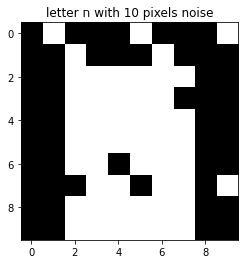

In [ ]:
plotImage(getNoiseLetter(hebrewLetters[7], 10), "letter ח with 10 pixels noise")

In [ ]:
def updateLetterState(letterState, M):
  newLetterState = np.zeros_like(letterState)
  for pixel_index in range(0, letterState.shape[0]):
    newLetterState[pixel_index] = np.sign(np.dot(M[pixel_index], letterState))
  return newLetterState

time 1 noise 10


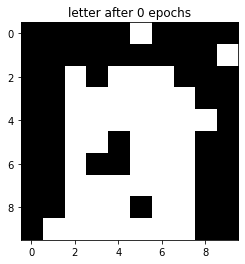

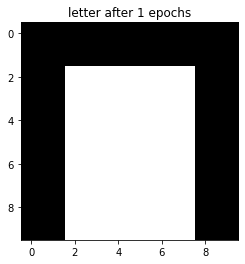

converge at epoch 1
time 2 noise 10


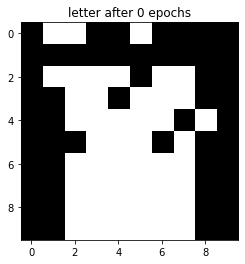

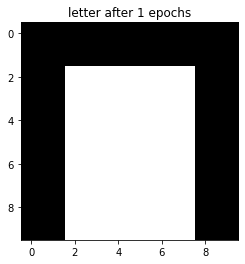

converge at epoch 1
time 3 noise 10


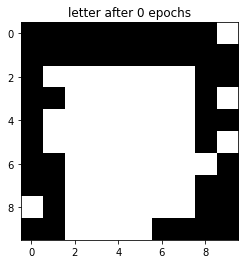

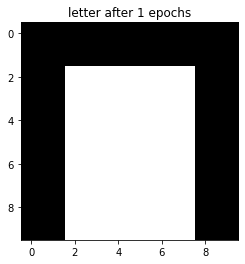

converge at epoch 1
time 4 noise 10


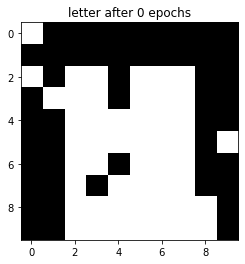

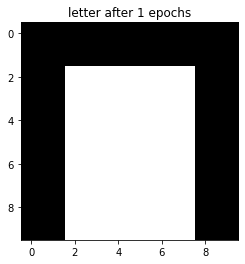

converge at epoch 1
time 5 noise 10


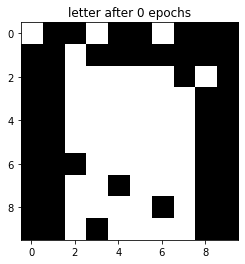

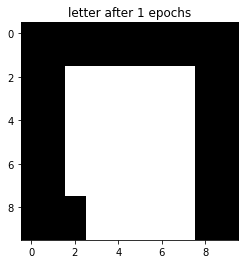

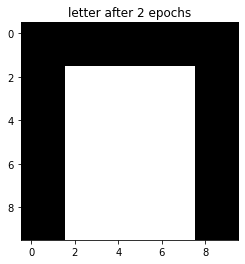

converge at epoch 2
time 6 noise 10


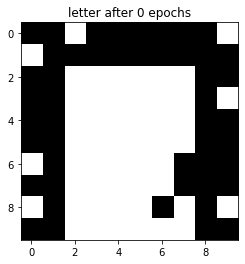

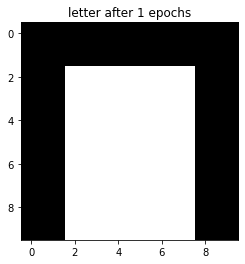

converge at epoch 1
time 7 noise 10


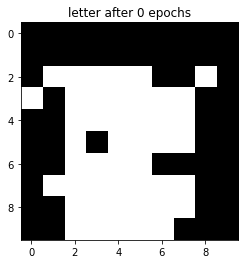

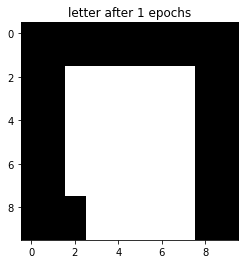

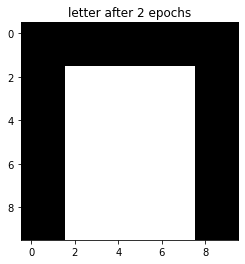

converge at epoch 2
time 8 noise 10


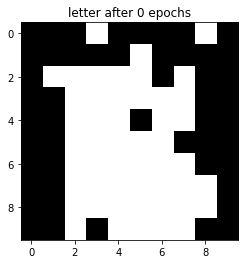

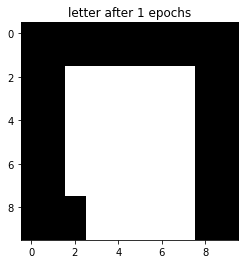

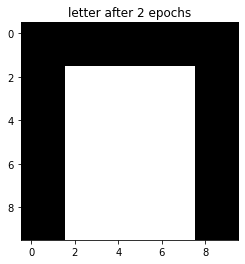

converge at epoch 2
time 9 noise 10


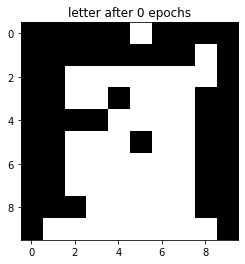

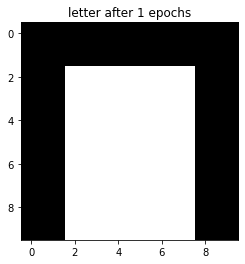

converge at epoch 1
time 10 noise 10


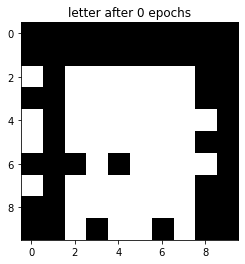

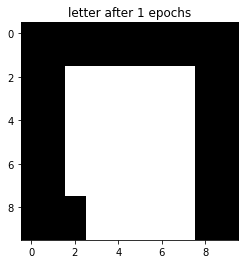

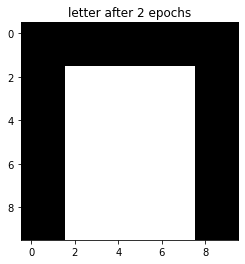

converge at epoch 2
time 1 noise 20


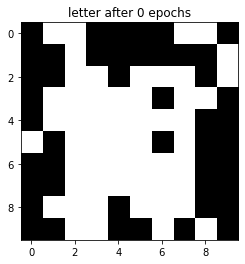

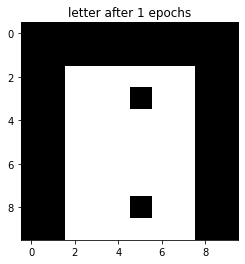

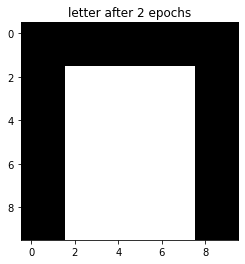

converge at epoch 2
time 2 noise 20


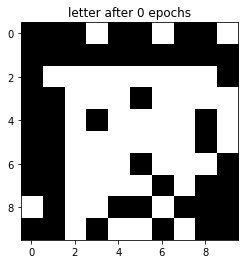

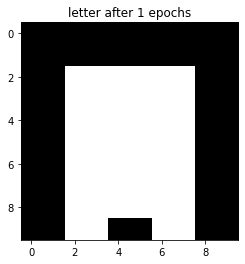

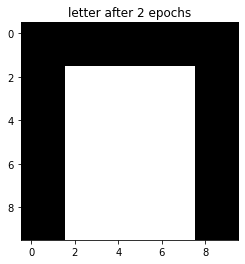

converge at epoch 2
time 3 noise 20


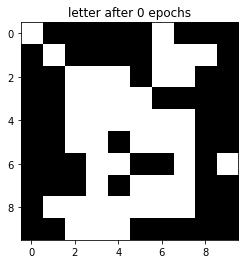

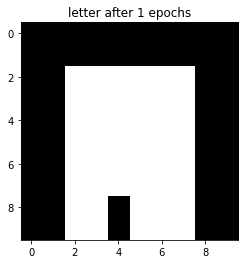

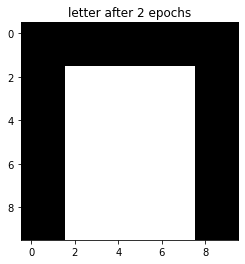

converge at epoch 2
time 4 noise 20


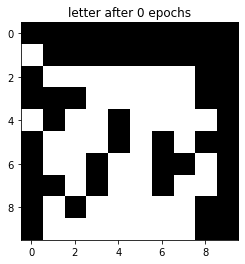

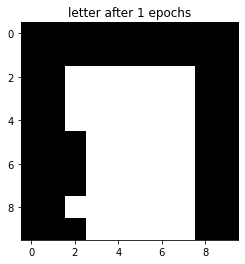

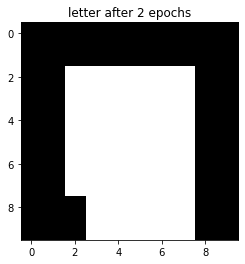

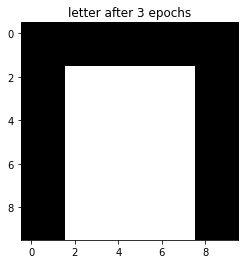

converge at epoch 3
time 5 noise 20


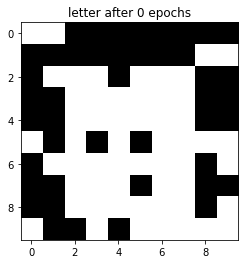

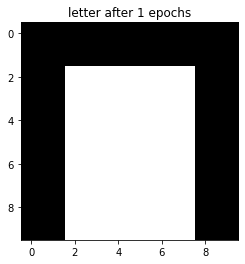

converge at epoch 1
time 6 noise 20


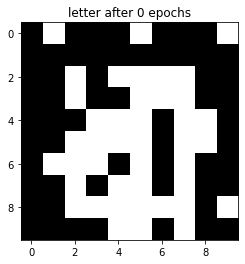

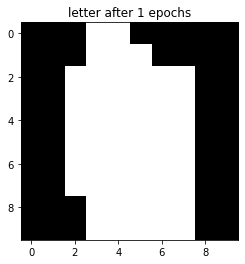

converge at epoch 1
time 7 noise 20


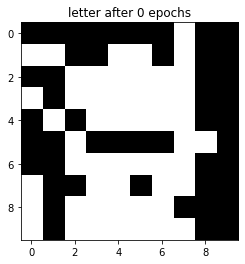

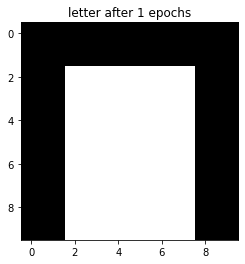

converge at epoch 1
time 8 noise 20


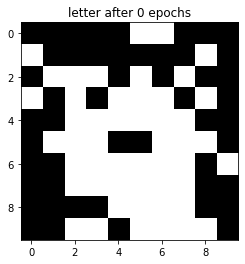

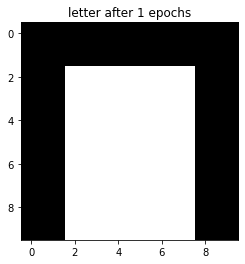

converge at epoch 1
time 9 noise 20


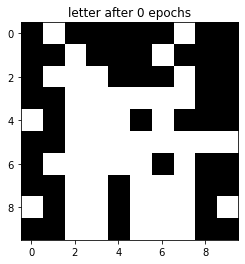

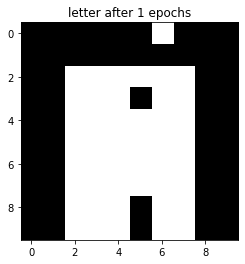

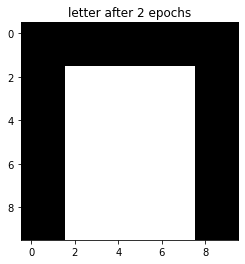

converge at epoch 2
time 10 noise 20


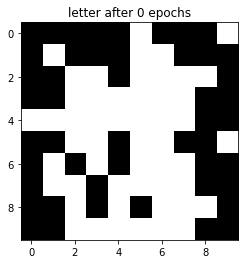

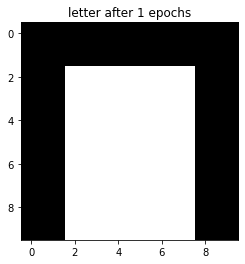

converge at epoch 1
time 1 noise 30


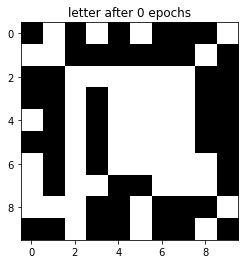

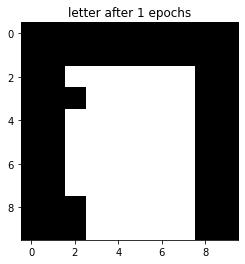

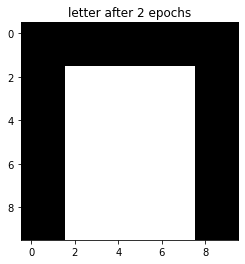

converge at epoch 2
time 2 noise 30


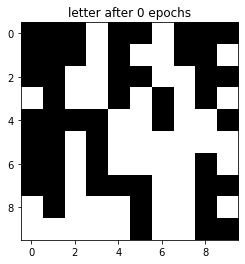

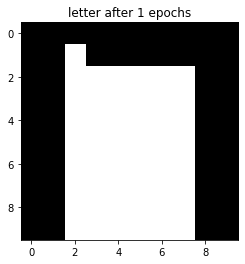

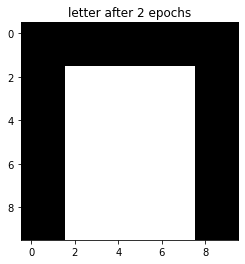

converge at epoch 2
time 3 noise 30


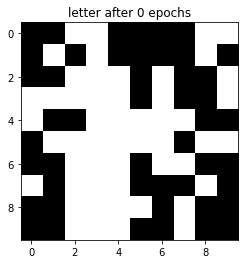

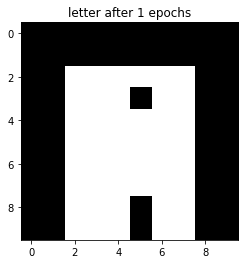

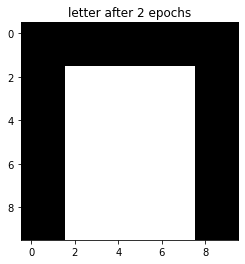

converge at epoch 2
time 4 noise 30


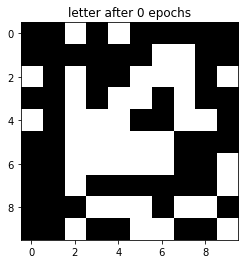

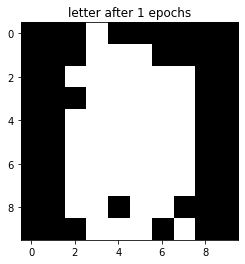

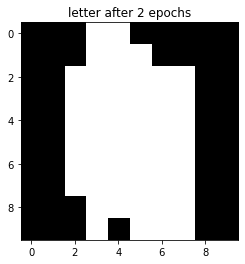

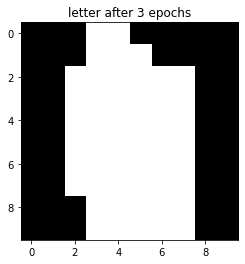

converge at epoch 3
time 5 noise 30


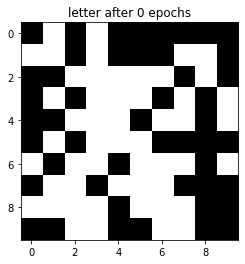

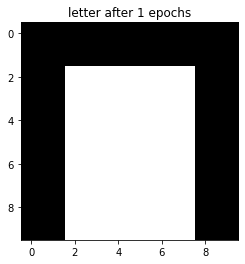

converge at epoch 1
time 6 noise 30


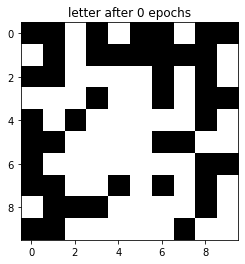

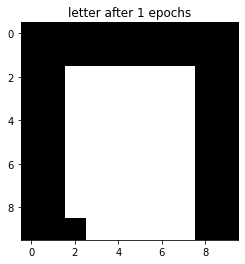

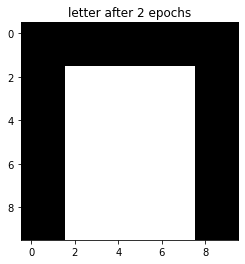

converge at epoch 2
time 7 noise 30


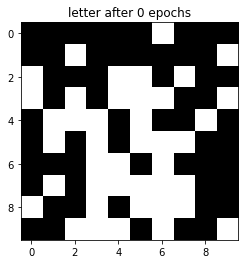

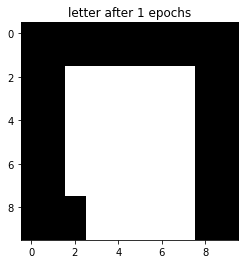

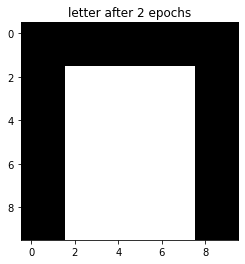

converge at epoch 2
time 8 noise 30


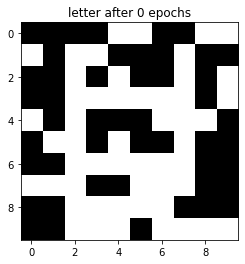

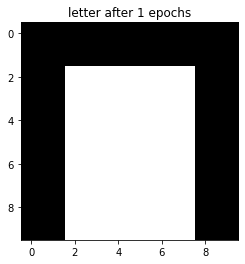

converge at epoch 1
time 9 noise 30


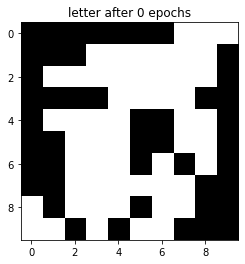

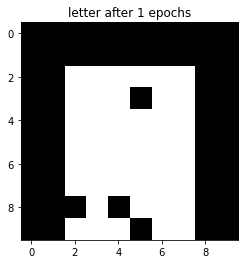

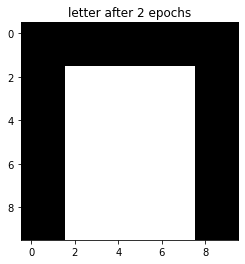

converge at epoch 2
time 10 noise 30


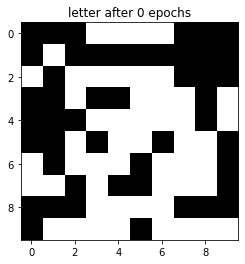

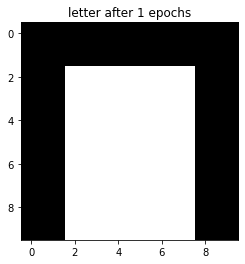

converge at epoch 1
time 1 noise 40


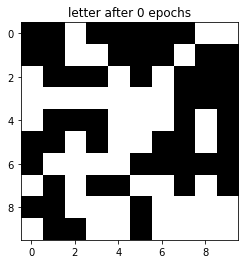

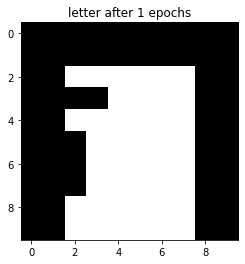

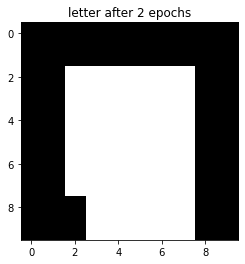

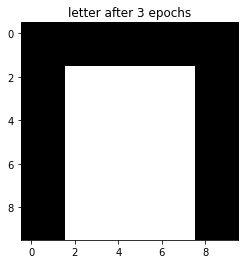

converge at epoch 3
time 2 noise 40


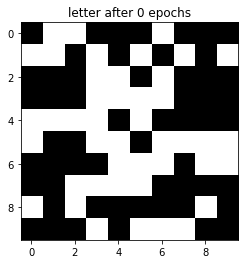

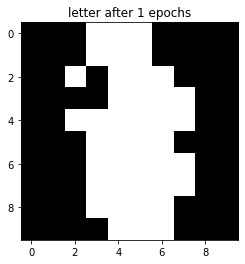

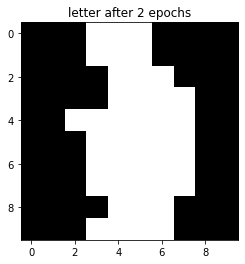

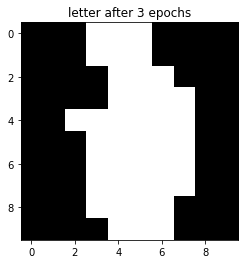

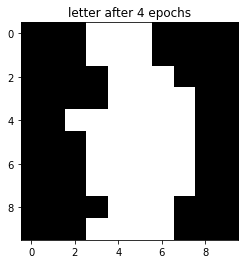

we find it to not converging at epoch 4
time 3 noise 40


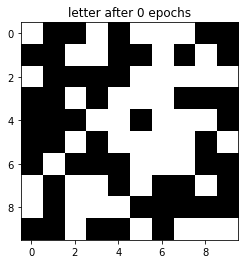

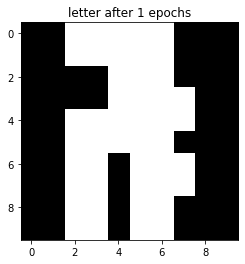

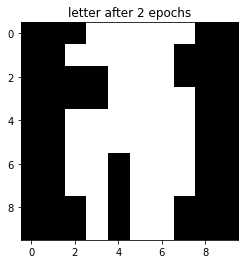

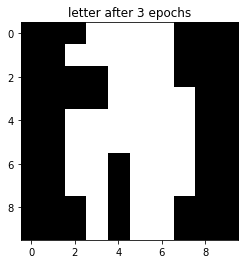

converge at epoch 3
time 4 noise 40


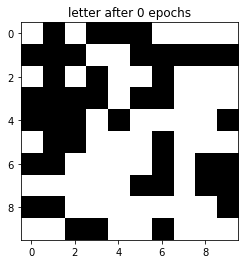

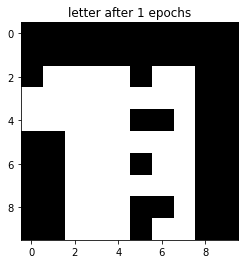

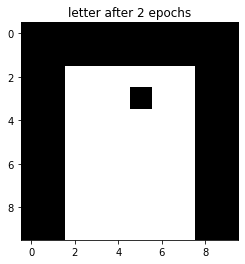

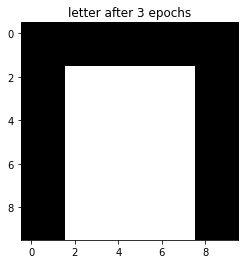

converge at epoch 3
time 5 noise 40


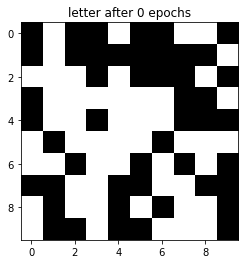

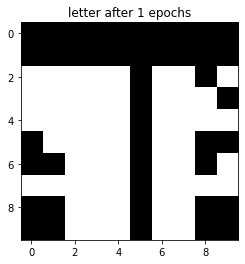

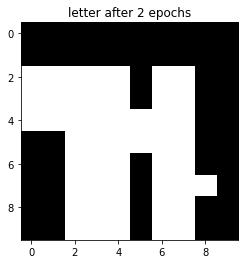

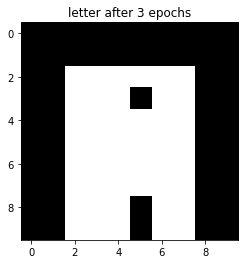

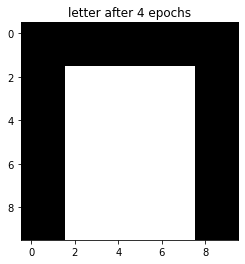

converge at epoch 4
time 6 noise 40


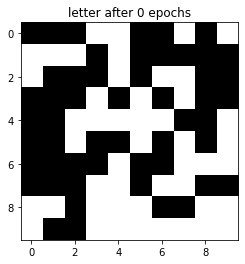

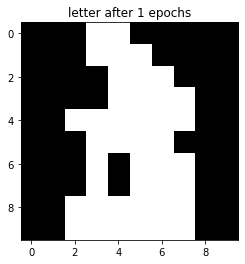

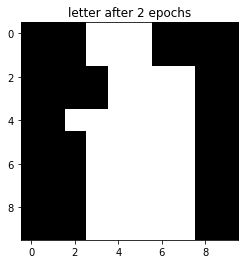

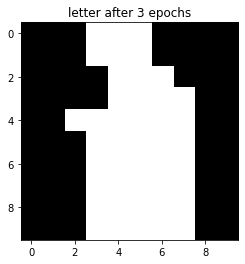

converge at epoch 3
time 7 noise 40


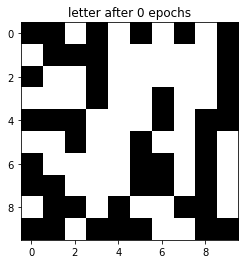

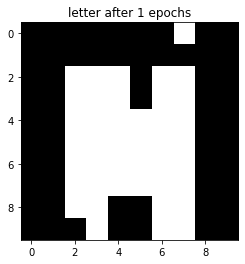

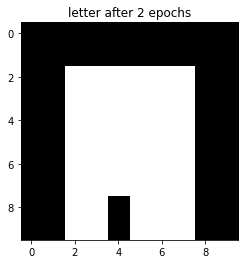

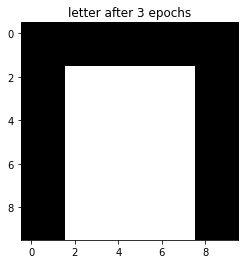

converge at epoch 3
time 8 noise 40


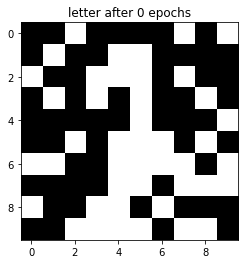

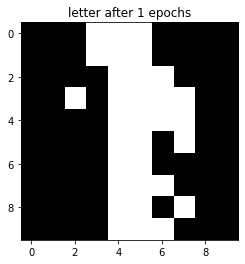

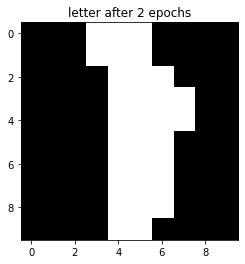

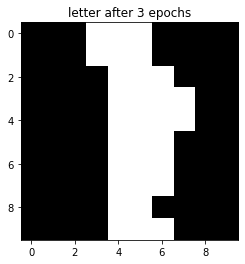

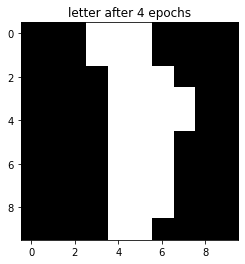

we find it to not converging at epoch 4
time 9 noise 40


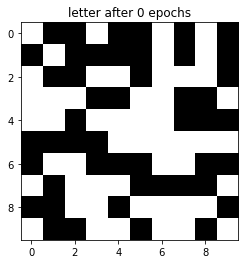

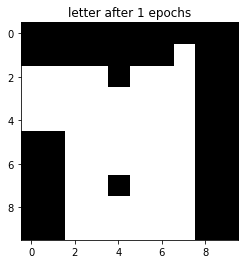

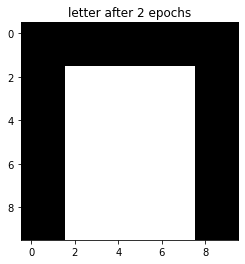

converge at epoch 2
time 10 noise 40


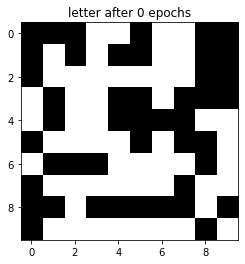

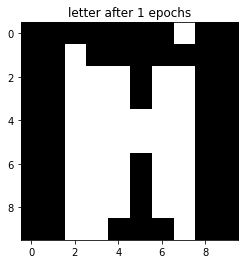

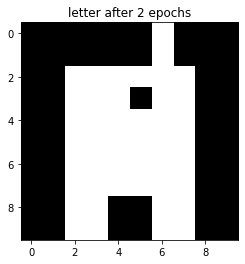

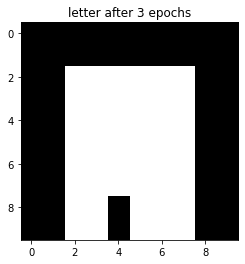

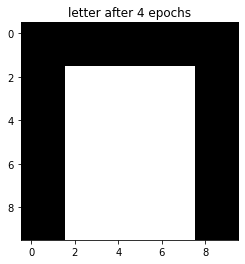

converge at epoch 4
time 1 noise 50


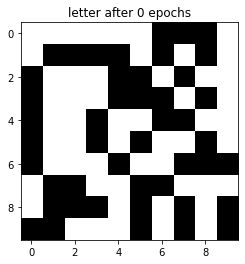

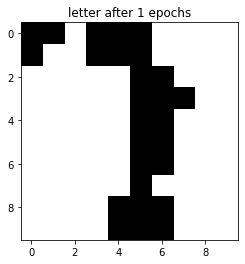

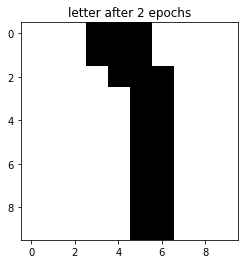

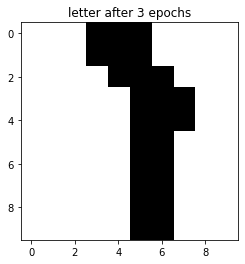

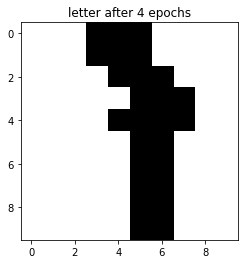

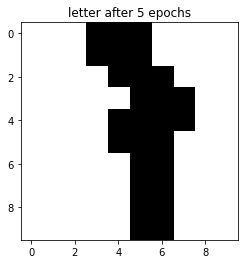

converge at epoch 5
time 2 noise 50


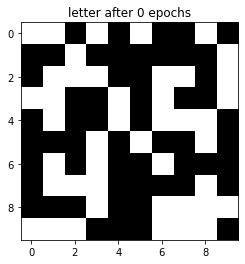

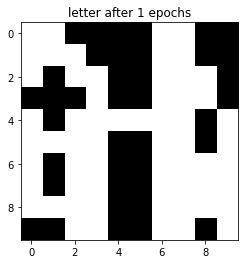

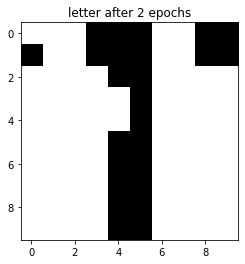

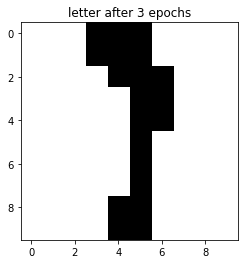

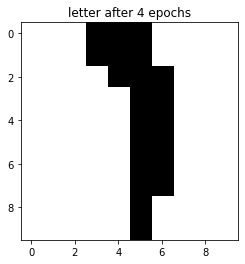

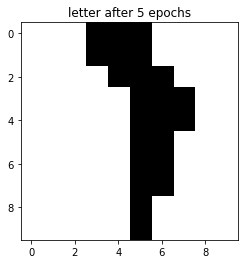

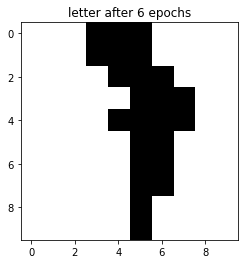

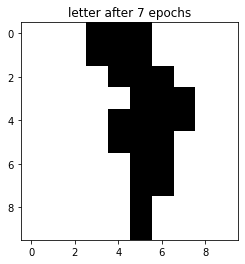

converge at epoch 7
time 3 noise 50


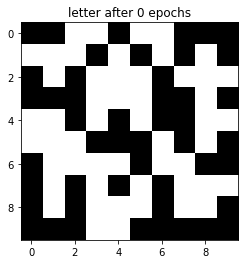

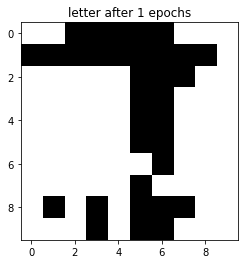

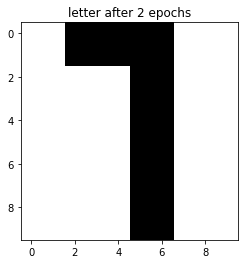

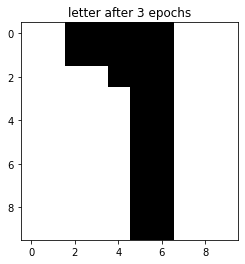

converge at epoch 3
time 4 noise 50


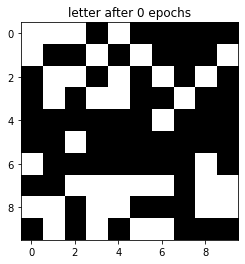

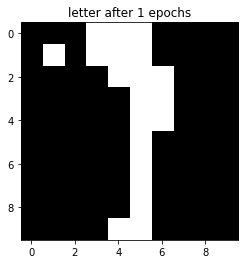

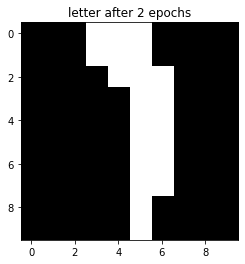

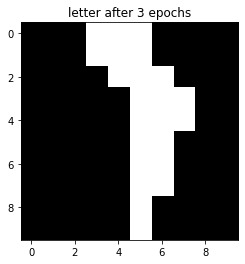

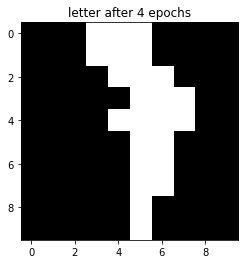

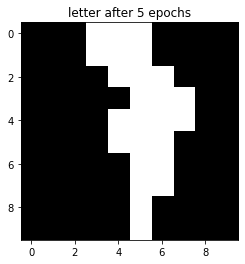

converge at epoch 5
time 5 noise 50


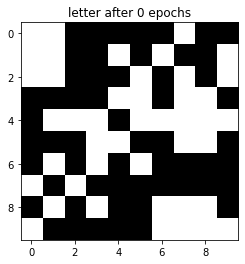

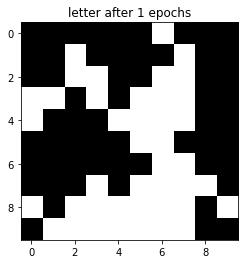

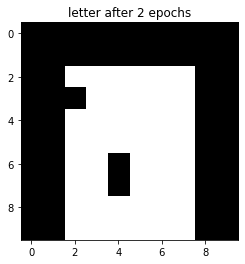

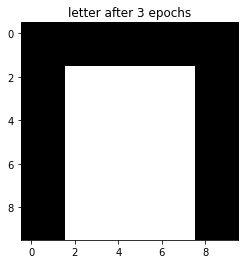

converge at epoch 3
time 6 noise 50


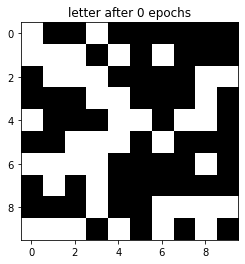

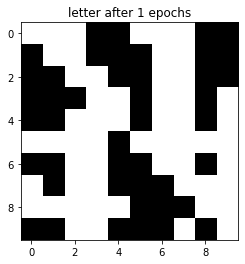

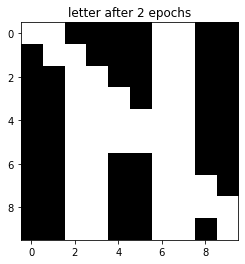

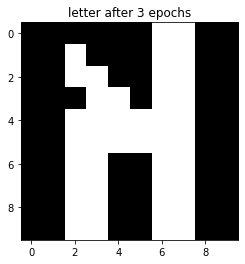

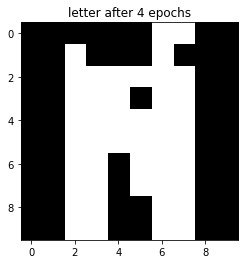

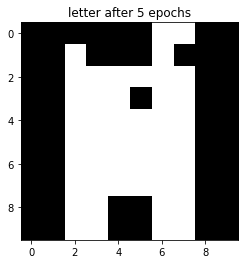

converge at epoch 5
time 7 noise 50


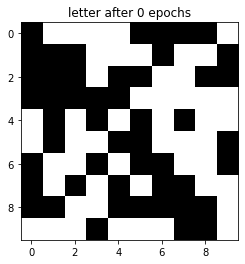

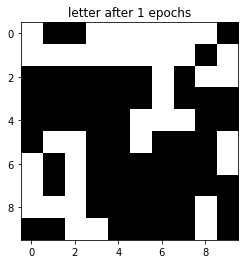

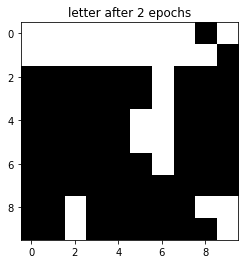

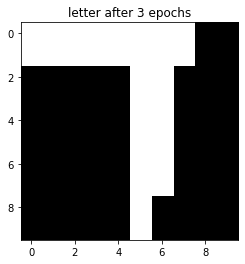

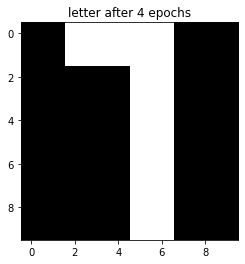

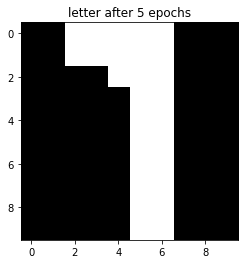

converge at epoch 5
time 8 noise 50


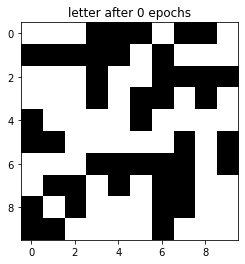

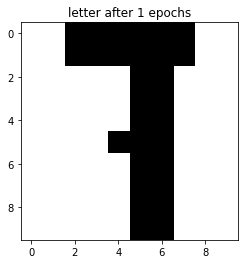

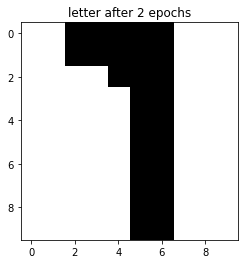

converge at epoch 2
time 9 noise 50


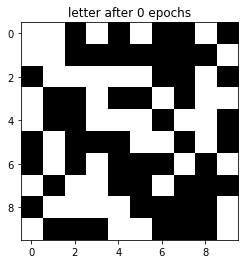

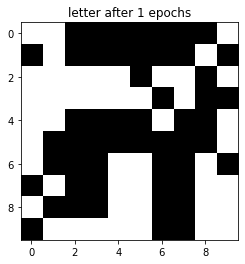

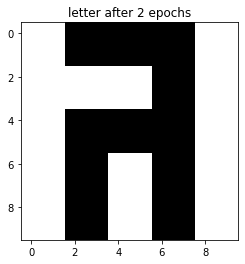

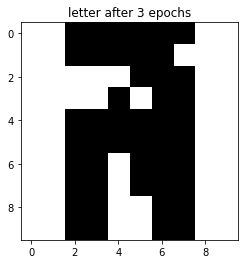

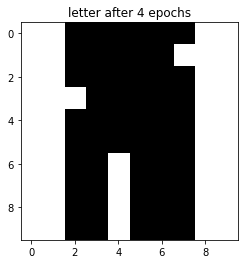

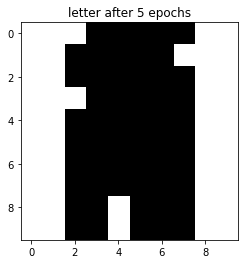

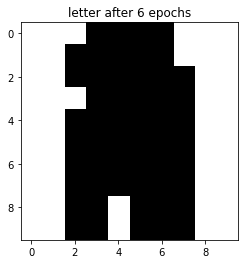

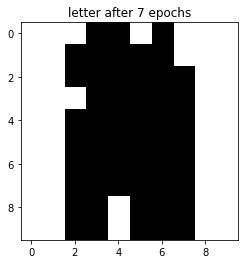

converge at epoch 7
time 10 noise 50


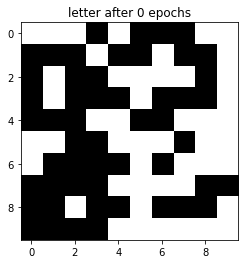

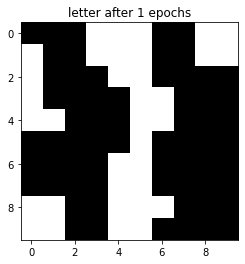

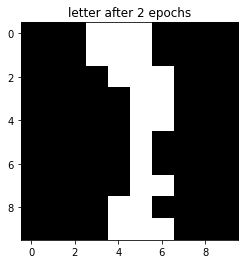

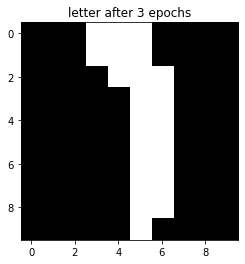

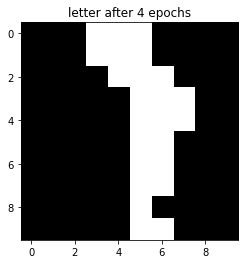

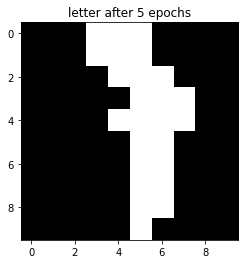

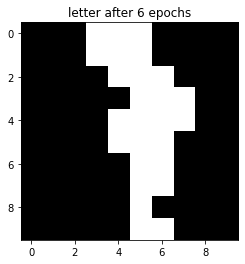

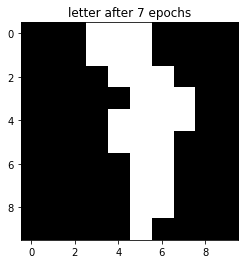

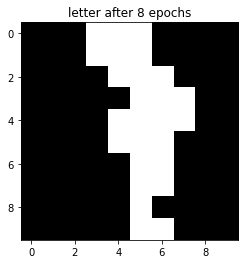

we find it to not converging at epoch 8


In [43]:
conterIsntConverging = 0
conterConverging2h = []
for noise in [10, 20, 30, 40, 50]:
  conterConverging2hNoise = 0
  for time in range(10):
    print("time "+str(time+1), "noise "+str(noise))
    hLetter = getNoiseLetter(hebrewLetters[7], noise)
    lasthLetter = np.zeros_like(hLetter)
    lastLasthLetter = np.zeros_like(hLetter)
    epoch = 0
    plotImage(hLetter, "letter after "+str(epoch)+" epochs")
    while ((isStateStable(hLetter, M) != True) & (np.array_equal(lastLasthLetter, hLetter) != True)):
      lastLasthLetter = lasthLetter
      lasthLetter = hLetter
      hLetter = updateLetterState(hLetter, M)
      epoch += 1
      plotImage(hLetter, "letter after "+str(epoch)+" epochs")
    
    if (isStateStable(hLetter, M)):
      if np.array_equal(hebrewLetters[7], hLetter):
        conterConverging2hNoise += 1
      print("converge at epoch "+str(epoch))
    else:
      conterIsntConverging += 1
      print("we find it to not converging at epoch "+str(epoch))
  conterConverging2h.append(conterConverging2hNoise)

In [44]:
print("conterIsntConverging "+str(conterIsntConverging))
print("conterConverging2h "+str(conterConverging2h))

conterIsntConverging 3
conterConverging2h [10, 9, 9, 6, 1]
